<a href="https://colab.research.google.com/github/ScarrryMary/IT_MIPT_group25-26/blob/main/Seminar_8_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

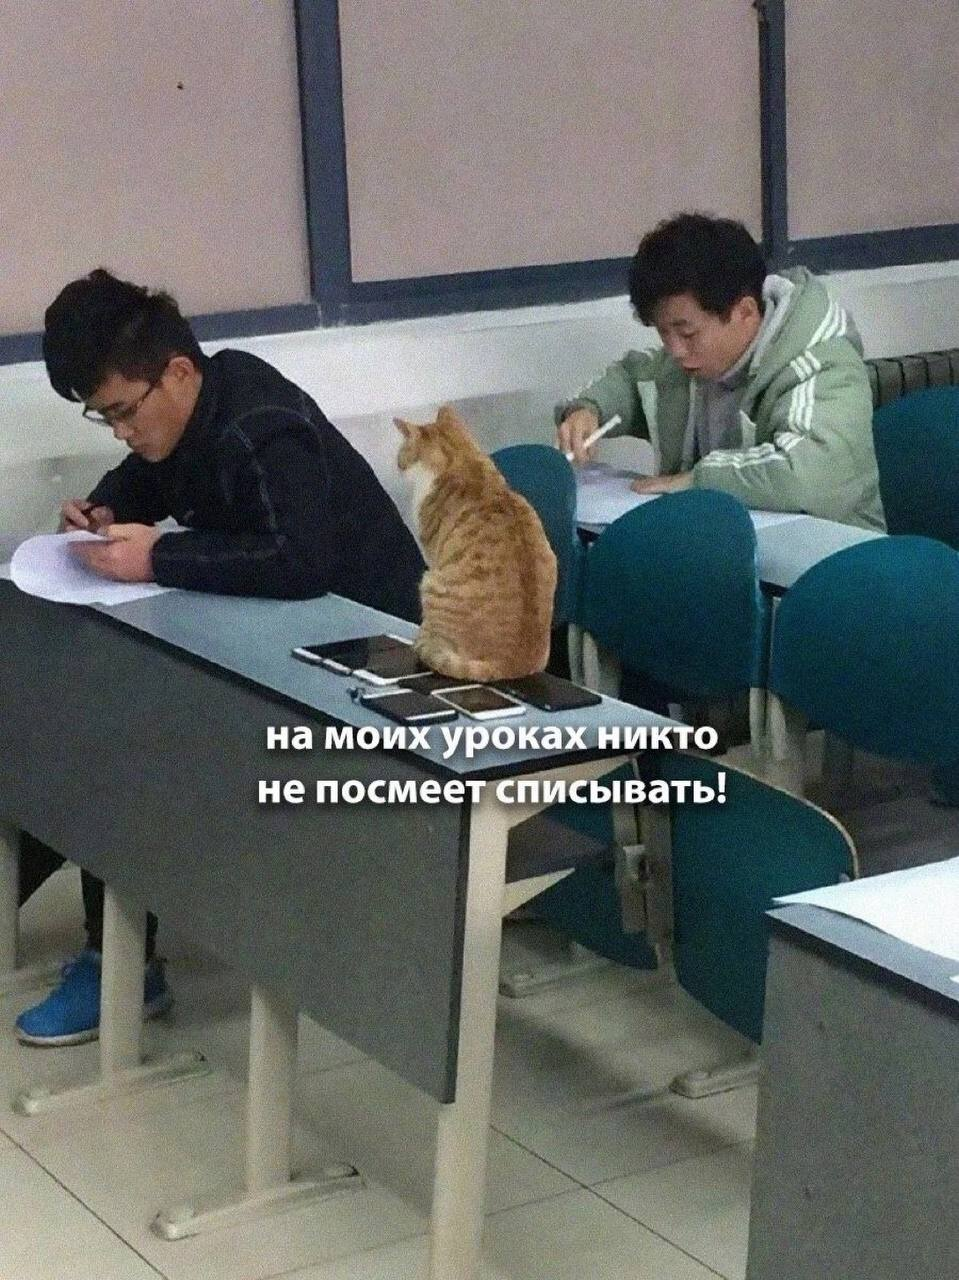

# Разминка

https://pythonist.ru/test-spiski-uroven-srednij/  

https://pythonist.ru/test-rabota-s-funkcziyami-v-python-2/


# Двумерное динамическое программирование

### **Задача №1**: Вычисление наибольшей возрастающей подпоследовательности (longest increasing subsequence)

In [5]:
def lis(n, a):
  d = [1] * n
  for i in range(1, n):
      for j in range(i):
          if a[j] < a[i]:
              d[i] = max(d[i], d[j] + 1)
  return d

n = int(input())
a = list(map(int, input().split()))
print(*lis(n, a))

6
3 1 4 1 5 9
1 1 2 1 3 4


### **Задача №2**: Наибольшая общая подпоследовательность

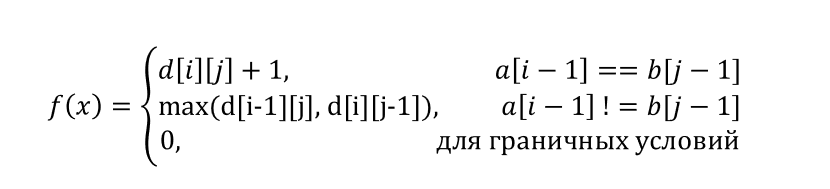

In [6]:
def lcs(a, b):
    n = len(a)
    m = len(b)

    d = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if a[i-1] == b[j-1]:
                d[i][j] = d[i-1][j-1] + 1
            else:
                d[i][j] = max(d[i-1][j], d[i][j-1])

    return d

a = list(map(int, input().split()))
b = list(map(int, input().split()))
d = lcs(a, b)

for line in d:
  print(*line)

1 2 3 4
2 4 1 3
0 0 0 0 0
0 0 0 1 1
0 1 1 1 1
0 1 1 1 2
0 1 2 2 2


### **Задача №3**: Задача о разбиении строки

Задача заключается в определении, можно ли разбить строку на последовательность одного или более слов из словаря.

In [7]:
def word_break(s, word_dict):
    dp = [False] * (len(s) + 1)
    dp[0] = True

    for i in range(1, len(s) + 1):
        for j in range(i):
            if dp[j] and s[j:i] in word_dict:
                dp[i] = True
                break

    return dp[len(s)]

s = "leetcodeotus"
word_dict = {"leet", "code", "otus"}
print(f"Can the string be segmented: {word_break(s, word_dict)}")

Can the string be segmented: True


### **Задача №4**: Черепашка

На каждой клетке двумерной таблички написано, сколько там лежит монет. Черепашка стоит в клетке 1x1 (верхней левой), и может двигаться только на одну клетку вниз, или на одну клетку вправо. Нужно найти максимальное число монет, которое может набрать черепашка по пути к нижней правой клетке NxM.

Первое, что приходит в голову - это просто идти черепашкой в ту клетку из соседних, где лежит больше монет. К сожалению, эта жадная стратегия не всегда работает. Например, на такой доске жадная черепашка пошла бы по следу из единичек, хотя гораздо выгоднее пойти сначала по нулям, а потом найти там большие горстки монет (40, 70, 100):

Тут нас снова спасает динамика. Давайте сводить задачу к предыдущей! Задачей назовем “сколько максимально монет можно набрать на пути от 0 x 0 до ixj” (заменим 1-нумерацию на 0-нумерацию). Будем хранить это в двумерном массиве dp в клетке dp[i][j].

Сразу понятны некоторые свойства этого массива: * Он размера NxM * dp[0][0] = COINS[0][0] * ответ на всю задачу лежит в dp[N - 1][M - 1]

Но гораздо важнее придумать формулу для подсчета dp[i][j] через предыдущие. Легко посчитать первую строку и первый столбец:   
dp[0][k] = dp[0][k - 1] + COINS[0][k]  
dp[k][0] = dp[k - 1][0] + COINS[k][0]

Так как до этих клеток есть ровно один путь.

Но что делать, если есть много путей до клетки dp[i][j]? Снова разобьем их на на несколько групп в зависимости от последнего хода (! важный трюк, запомните). Последний ход был: либо из [i][j - 1], либо из [i - 1][j]

Поэтому формула для максимального числа монет такая: dp[i][j] = max(dp[i - 1][j], dp[i][j - 1]) + COINS[i][j].

Ну все, достаточно пройтись правильно по двумерному массиву (построчно сверху вних, а в каждой строке слева направо) и заполнить этот массив.

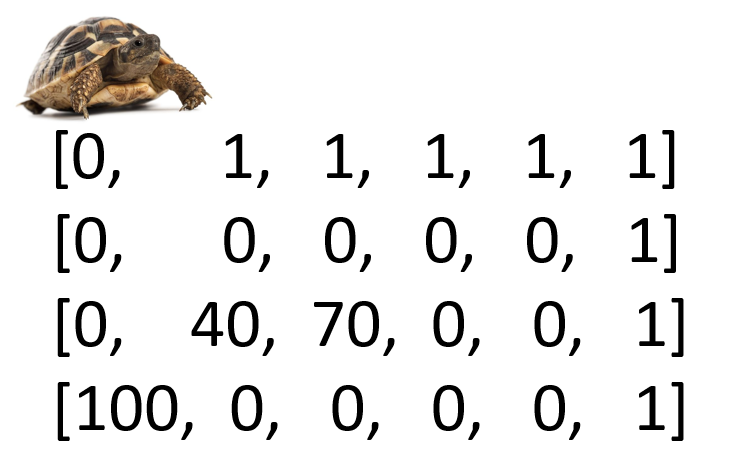

In [8]:
COINS = [
    [0,   1,   1,   1,   1,   1],
    [0,   0,   0,   0,   0,   1],
    [0,   40,  70,  0,   0,   1],
    [100, 0,   0,   0,   0,   1]
]
N = 4
M = 6

dp = [[None] * M for i in range(N)]

for i in range(N):
    for j in range(M):
        if i == 0 and j == 0:
            dp[0][0] = COINS[0][0]
        elif i == 0:
            dp[0][j] = dp[0][j - 1] + COINS[0][j]
        elif j == 0:
            dp[i][0] = dp[i - 1][0] + COINS[i][0]
        else:
            dp[i][j] = max(dp[i - 1][j], dp[i][j - 1]) + COINS[i][j]
    print(dp[i])

[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 6]
[0, 41, 111, 111, 111, 112]
[100, 100, 111, 111, 111, 113]


### Восстановление пути


В последней задаче было здорово найти, что в оптимальном пути черепашки набирается 113 монет, но интересно, что именно это за путь. Такую задачу называют восстановлением ответа в динамике.

Есть два способа, которыми можно это сделать.

1. Хранить в массив prev откуда ты пришел в эту клетку.  

Когда мы выбираем максимум из левой и верхней клетки, мы на самом деле решаем, какой последний ход будет в оптимальном пути до этой клетки - сверху или слева, и берем ответ для той клетки, сложнный с монетами в этой клетке. Давайте координаты клетки, откуда мы пришли, хранить в массиве prev. Или, в данном случае, можно хранить не координаты а просто 1, если пришли слева, и 0, если пришли сверху.

In [11]:
dp = [[None] * M for i in range(N)]
prev = [[None] * M for i in range(N)]

for i in range(N):
    for j in range(M):
        if i == 0 and j == 0:
            dp[0][0] = COINS[0][0]
            prev[0][0] = -1 # это самое начало, предыдущей клетки нет
        elif i == 0:
            dp[0][j] = dp[0][j - 1] + COINS[0][j]
            prev[0][j] = 0 # слева пришли
        elif j == 0:
            dp[i][0] = dp[i - 1][0] + COINS[i][0]
            prev[i][0] = 1 # сверху пришли
        else:
            dp[i][j] = max(dp[i - 1][j], dp[i][j - 1]) + COINS[i][j]
            if dp[i - 1][j] > dp[i][j - 1]:
                prev[i][j] = 1
            else:
                prev[i][j] = 0
    print(prev[i])

[-1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]
[1, 1, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 1]


И, чтобы восстановить ответ, надо просто пройтись с конца по этим клеткам до самого начала, и развернуть получившуюся последовательность.

In [13]:
i, j = N - 1, M - 1
answer = []
answer_directions = []
while i > 0 or j > 0:
    if prev[i][j] == 1:
        i -= 1
        answer_directions.append('DOWN')
    else:
        j -= 1
        answer_directions.append('RIGHT')
    answer.append((i, j))
print(answer[::-1]) # reverse
print(answer_directions[::-1]) # reverse

[(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5)]
['RIGHT', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN']


2. Вместо хранения массива prev догадаться по массиву dp, откуда именно черепашка пришла в эту клетку.  
В данном примере это довольно легко. Если мы уже посчитали весь массив dp, то теперь можно начиная с конца легко понять, пришла черепашка туда сверху или слева в оптимальном маршруте - она пришла из клетки с максимальным числом монет.

In [14]:
i, j = N - 1, M - 1
answer = []
answer_directions = []
while i > 0 or j > 0:
    if i != 0 and (j == 0 or dp[i - 1][j] > dp[i][j - 1]):
        i -= 1
        answer_directions.append('DOWN')
    else:
        j -= 1
        answer_directions.append('RIGHT')
    answer.append((i, j))
print(answer[::-1]) # reverse
print(answer_directions[::-1]) # reverse

[(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5)]
['RIGHT', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN']


### Задача №5: Расстояние Левенштейна (редакционное расстояние)
Дальше следует материал по статье: https://habr.com/ru/articles/676858/?ysclid=mh3mcxqbt517896452

Расстояние Левенштейна, или редакционное расстояние, — метрика cходства между двумя строковыми последовательностями. Чем больше расстояние, тем более различны строки. Для двух одинаковых последовательностей расстояние равно нулю. По сути, это минимальное число односимвольных преобразований (удаления, вставки или замены), необходимых, чтобы превратить одну последовательность в другую.

Например, LEV(’БИБА’, ‘БОБА’) = 1, так как потребуется провести одну замену ‘И’ на ‘О’.

Расстояние Левенштейна активно используется для исправления ошибок в словах, поиска дубликатов текстов, сравнения геномов и прочих полезных операций с символьными последовательностями.

> Метрика названа в честь советского математика, выпускника мехмата МГУ Владимира Иосифовича Левенштейна. Он всю жизнь проработал в Институте Прикладной Математики им. М.В.Келдыша, умер в 2017 году.



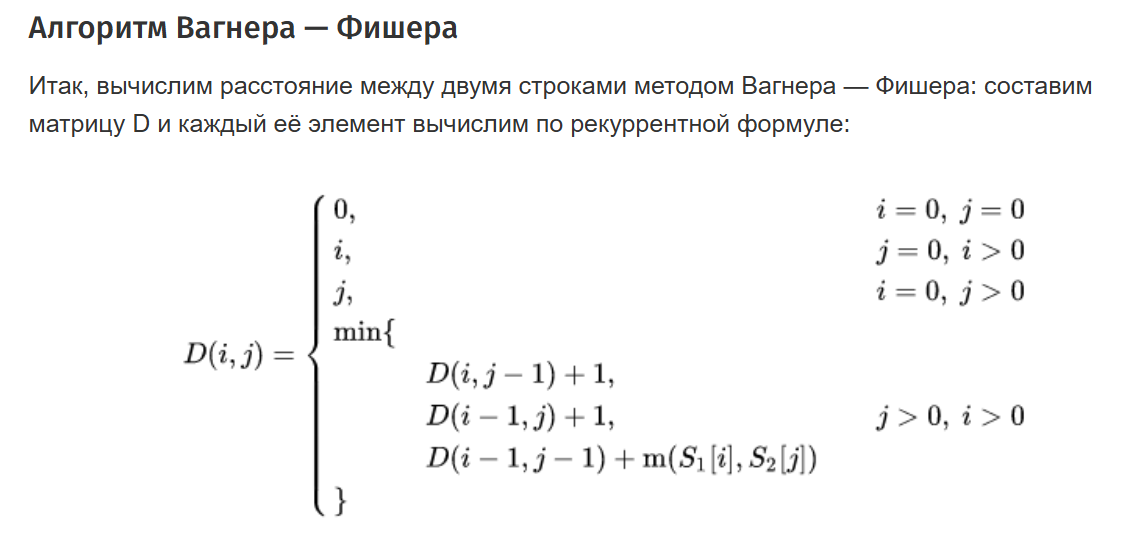

Ясно, что первые три строчки рекуррентной формулы помогут нам заполнить только первый столбец и первую строку таблицы. Для всех остальных ячеек мы будем пользоваться четвёртой строкой — той, что с минимумом. Здесь $S_1[i], S_2[j]$— символы, соответствующие ячейкам i и j. Оператор $m(S_1[i],S_2[j]) = 1$,если символы $S_1[i]$ и $S_2[i]$ не равны друг другу, и $m(S_1[i],S_2[j]) = 0$, если равны.

Обратите внимание, что первый символ последовательности будет иметь индекс 1, как принято в математике, а не 0.

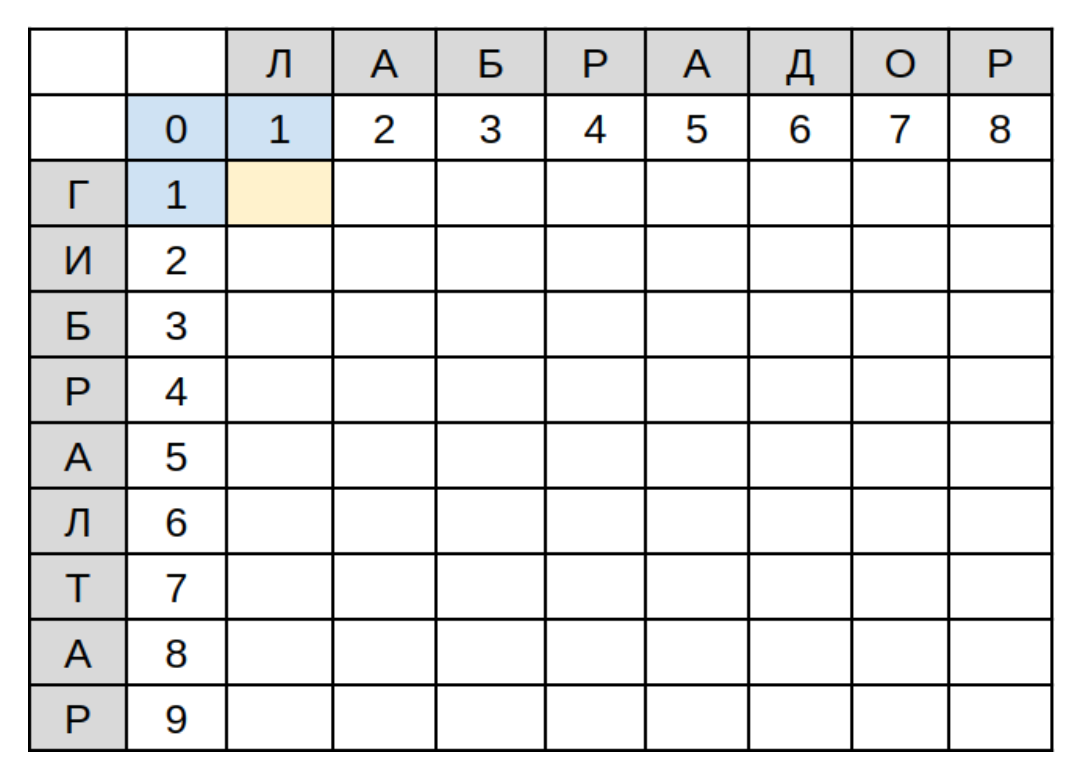

Рассчитаем D(1,1), это символы ‘Г’ и ‘Л’. Они не равны друг другу, значит m(’Г’, ‘Л’) = 1. Тогда D(1,1) — это минимум между значениями D(0,1) + 1, D(1,0) + 1 и D(0, 0) + m(’Г’, ‘Л’) = D(0, 0) + 1. Эти клетки выделены голубым. То есть min(1+1, 1+1, 0+1) = min(2, 2, 1) = 1.

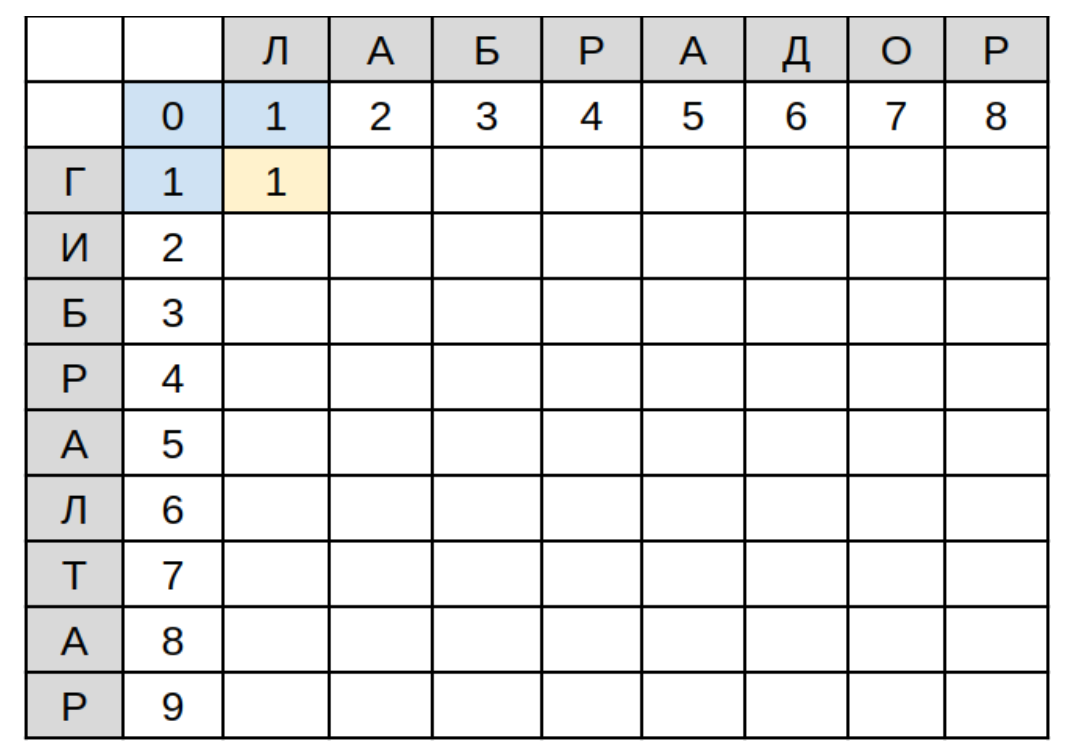

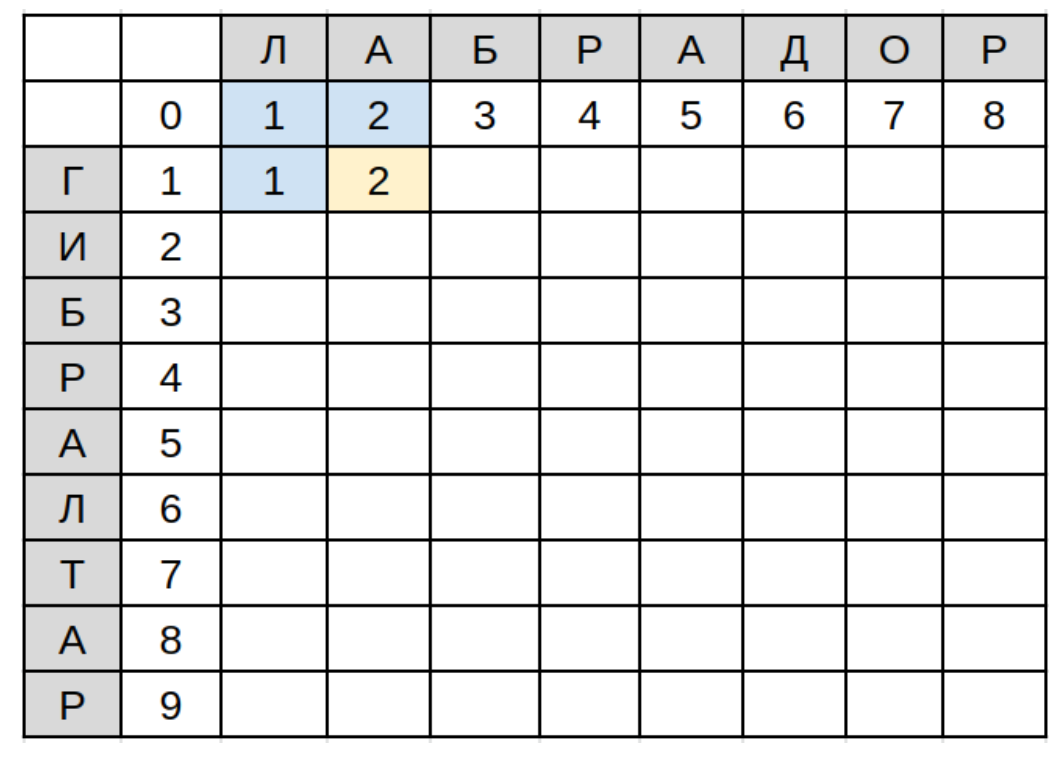

Передвигая голубой уголок, аналогично заполним первые две строки и начало третьей, пока не доберёмся до совпадающих символов ‘Б’ в D(3,3):

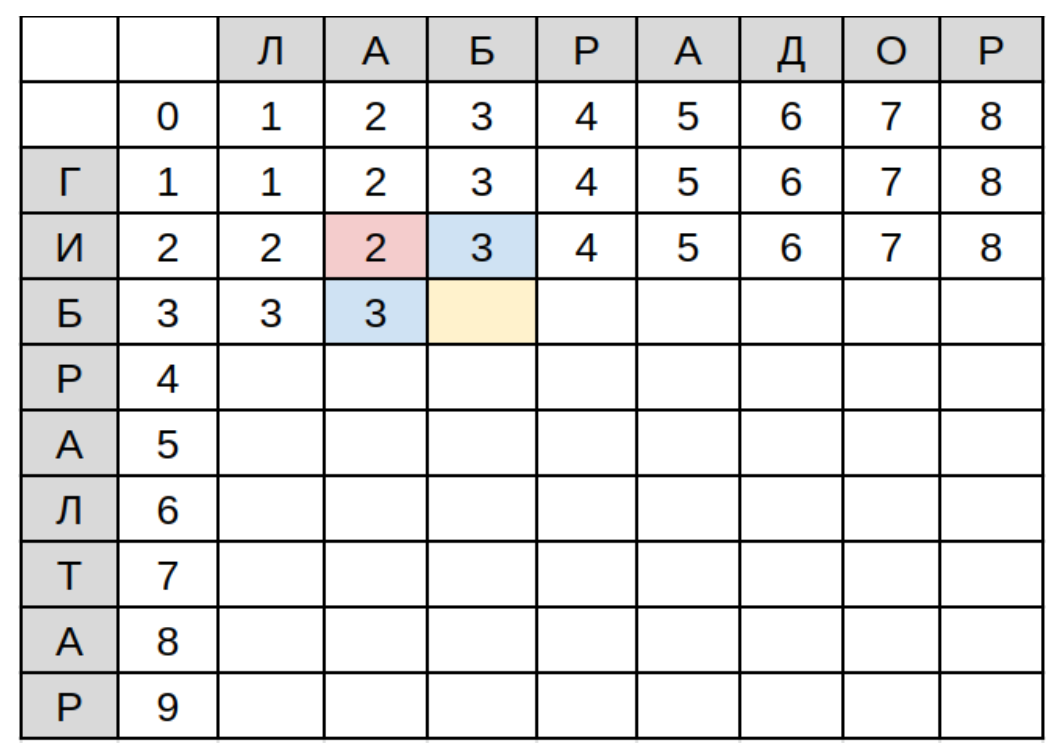

Из-за того, что символы совпадают, замена этим двум символам не нужна, поэтому при подсчёте минимума число в розовой ячейке не увеличивается на единицу, т.е. D(3, 3) = min(D(2,3) + 1; D(3,2) + 1; D(2, 2) + 0) = min(3+1; 3+1; 2+0) = 2.

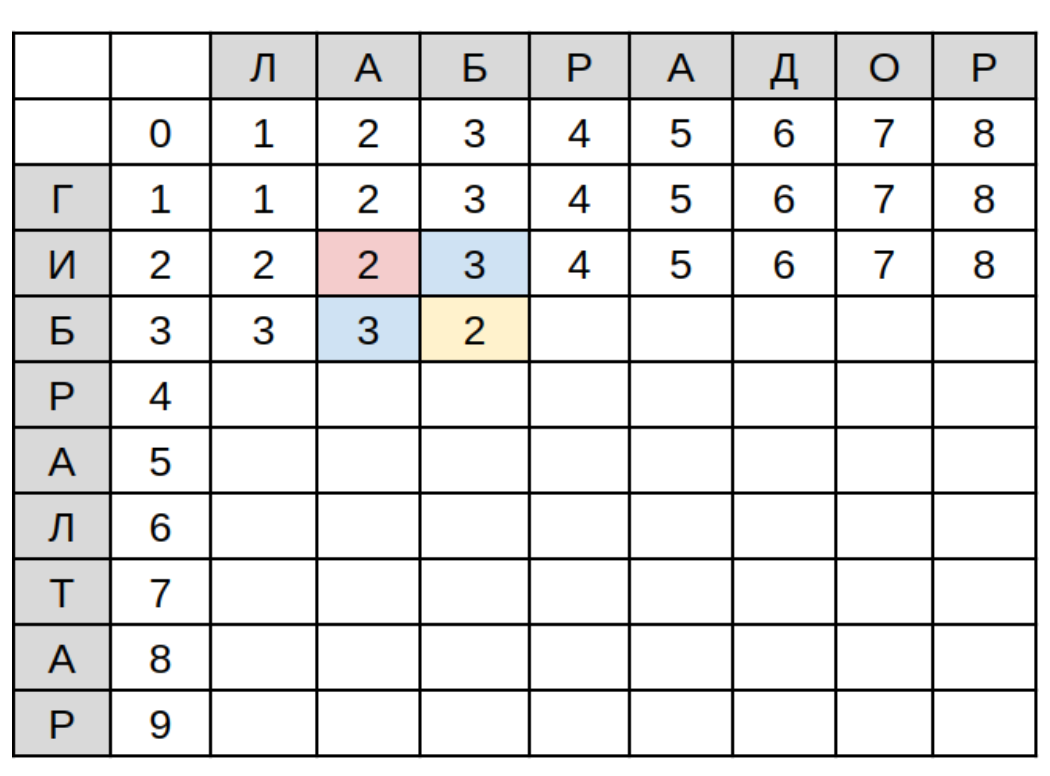

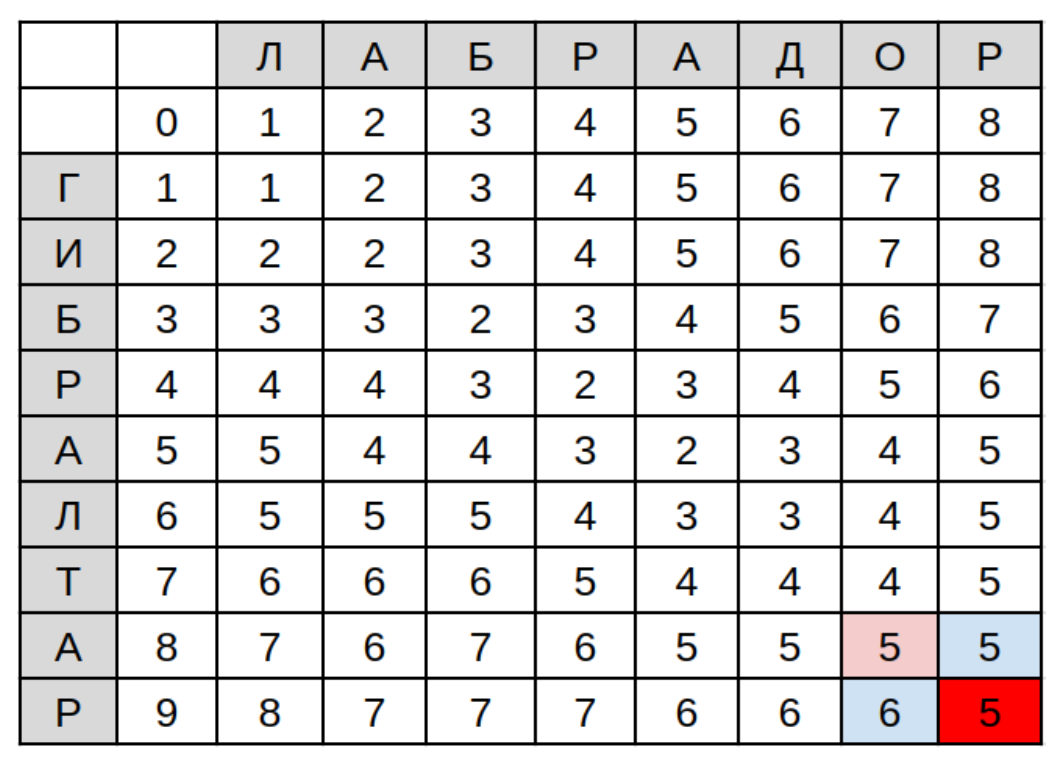

In [19]:
def levenstein(str_1, str_2):
    n, m = len(str_1), len(str_2)
    if n > m:
        str_1, str_2 = str_2, str_1
        n, m = m, n

    current_row = range(n + 1)
    for i in range(1, m + 1):
        previous_row, current_row = current_row, [i] + [0] * n
        for j in range(1, n + 1):
            add, delete, change = previous_row[j] + 1, current_row[j - 1] + 1, previous_row[j - 1]
            if str_1[j - 1] != str_2[i - 1]:
                change += 1
            current_row[j] = min(add, delete, change)

    return current_row[n]

str_1 = "кот"
str_2 = "скат"
print(levenstein(str_1, str_2))

2


# Для закрепления ООП

* **Стек (Stack)**  
Стек - структура данных LIFO (Last-In-First-Out), где элементы добавляются и удаляются с одного конца (вершины).

Основные операции:

* push(x) - добавить элемент на вершину

* pop() - удалить и вернуть верхний элемент

* peek() - посмотреть верхний элемент без удаления

* is_empty() - проверка на пустоту


In [20]:
class Stack:
    def __init__(self):
        self.items = []

    def push(self, item):
        """Добавление элемента на вершину стека"""
        self.items.append(item)

    def pop(self):
        """Удаление и возврат верхнего элемента"""
        if not self.is_empty():
            return self.items.pop()
        raise IndexError("pop from empty stack")

    def peek(self):
        """Просмотр верхнего элемента без удаления"""
        if not self.is_empty():
            return self.items[-1]
        raise IndexError("peek from empty stack")

    def is_empty(self):
        """Проверка на пустоту"""
        return len(self.items) == 0

    def size(self):
        """Размер стека"""
        return len(self.items)

    def __str__(self):
        return f"Stack({self.items})"

# Пример использования
stack = Stack()
stack.push(1)
stack.push(2)
stack.push(3)
print(stack)  # Stack([1, 2, 3])
print(stack.pop())  # 3
print(stack.peek())  # 2
print(stack.is_empty())  # False

Stack([1, 2, 3])
3
2
False


* **Очередь (Queue)**   
Очередь - структура данных FIFO (First-In-First-Out), где элементы добавляются в конец и удаляются из начала.

Основные операции:

* enqueue(x) - добавить элемент в конец

* dequeue() - удалить и вернуть первый элемент

* front() - посмотреть первый элемент

* is_empty() - проверка на пустоту

In [ ]:
class Queue:
    def __init__(self):
        self.items = []

    def enqueue(self, item):
        """Добавление элемента в конец очереди"""
        self.items.append(item)

    def dequeue(self):
        """Удаление и возврат первого элемента"""
        if not self.is_empty():
            return self.items.pop(0)
        raise IndexError("dequeue from empty queue")

    def front(self):
        """Просмотр первого элемента без удаления"""
        if not self.is_empty():
            return self.items[0]
        raise IndexError("front from empty queue")

    def is_empty(self):
        """Проверка на пустоту"""
        return len(self.items) == 0

    def size(self):
        """Размер очереди"""
        return len(self.items)

    def __str__(self):
        return f"Queue({self.items})"

# Пример использования
queue = Queue()
queue.enqueue(1)
queue.enqueue(2)
queue.enqueue(3)
print(queue)  # Queue([1, 2, 3])
print(queue.dequeue())  # 1
print(queue.front())    # 2
print(queue.size())     # 2

* **Дек (Deque - Double Ended Queue)**  
Дек - двусторонняя очередь, позволяющая добавлять и удалять элементы с обоих концов.

Основные операции:

* add_front(x) - добавить в начало

* add_rear(x) - добавить в конец

* remove_front() - удалить из начала

* remove_rear() - удалить из конца

* peek_front() - посмотреть первый элемент

* peek_rear() - посмотреть последний элемент

In [22]:
class Deque:
    def __init__(self):
        self.items = []

    def add_front(self, item):
        """Добавление в начало"""
        self.items.insert(0, item)

    def add_rear(self, item):
        """Добавление в конец"""
        self.items.append(item)

    def remove_front(self):
        """Удаление из начала"""
        if not self.is_empty():
            return self.items.pop(0)
        raise IndexError("remove_front from empty deque")

    def remove_rear(self):
        """Удаление из конца"""
        if not self.is_empty():
            return self.items.pop()
        raise IndexError("remove_rear from empty deque")

    def peek_front(self):
        """Просмотр первого элемента"""
        if not self.is_empty():
            return self.items[0]
        raise IndexError("peek_front from empty deque")

    def peek_rear(self):
        """Просмотр последнего элемента"""
        if not self.is_empty():
            return self.items[-1]
        raise IndexError("peek_rear from empty deque")

    def is_empty(self):
        return len(self.items) == 0

    def size(self):
        return len(self.items)

    def __str__(self):
        return f"Deque({self.items})"

# Пример использования
deque = Deque()
deque.add_rear(1)
deque.add_front(2)
deque.add_rear(3)
print(deque)  # Deque([2, 1, 3])
print(deque.remove_front())  # 2
print(deque.remove_rear())   # 3

Deque([2, 1, 3])
2
3


In [23]:
from collections import deque

# Создание дека
d = deque([1, 2, 3])

# Основные операции
d.append(4)           # добавить в конец
d.appendleft(0)       # добавить в начало
d.pop()               # удалить с конца
d.popleft()           # удалить с начала

# Дополнительные возможности
d.rotate(1)           # циклический сдвиг вправо
d.rotate(-1)          # циклический сдвиг влево
d.extend([5, 6])      # добавить несколько в конец
d.extendleft([-1, -2]) # добавить несколько в начало

print(d)  # deque([-2, -1, 0, 1, 2, 3, 5])

deque([-2, -1, 1, 2, 3, 5, 6])


In [24]:
def is_palindrome(word):
    """Проверка строки на палиндром с использованием дека"""
    char_deque = Deque()

    # Добавляем все символы в дек
    for char in word.lower():
        if char.isalpha():  # игнорируем пробелы и знаки препинания
            char_deque.add_rear(char)

    # Сравниваем символы с обоих концов
    while char_deque.size() > 1:
        front = char_deque.remove_front()
        rear = char_deque.remove_rear()
        if front != rear:
            return False

    return True

# Тесты
print(is_palindrome("radar"))        # True
print(is_palindrome("А роза упала на лапу Азора"))  # True
print(is_palindrome("hello"))        # False

True
True
False


| Структура | Принцип      | Основные операции                              | Сложность операций |
|-----------|--------------|------------------------------------------------|--------------------|
| Стек      | LIFO         | push, pop                                      | O(1)               |
| Очередь   | FIFO         | enqueue, dequeue                               | O(1)               |
| Дек       | Двусторонний | add_front, add_rear, remove_front, remove_rear | O(1)               |

## **Упражнение 8.1**: Двусвязный список
Вам предлагается реализовать **двусвязный** список, поддерживающий операции вставки элемента (в произвольную позицию, по индексу, куда происходит вставка), получения значения в элементе по индексу, удаления элемента (по индексу), а также для которого правильно определена базовая функция len().

В качестве основы и примера можете использовать [реализацию](https://habr.com/ru/companies/otus/articles/470828/) **односвязного** списка и модифицировать ее под нашу задачу.

# Функции от произвольного количества аргументов

Наверняка в ходе решения задач вы задавались вопросом: как можно сделать функцию, которая способна принимать разное, заранее неизвестное количество аргументов?

Что же, пора вскрыть покровы, познакомьтесь с *args и **kwargs!

- ``*args`` используется для передачи неопределенного числа неименованных аргументов. Если поставить звездочку перед именем, это имя будет представлять собой кортеж из всех переданных аргументов функции.

```python
def function(*args):
    for i in args:
        print(i)

function(1, 2, 3, 4)
```
В приведенном выше примере, args — это кортеж (1, 2, 3, 4).

- ``**kwargs`` работает так же, как и ``*args``, но вместо кортежа используется словарь. Это позволяет функции принимать любое количество именованных аргументов.

```python
def function(**kwargs):
    for name, value in kwargs.items():
        print(f'{name} = {value}')

function(a=1, b=2, c=3)
```
В этом примере, kwargs — это словарь {'a': 1, 'b': 2, 'c': 3}.

- Функция может быть определена как принимающая и ``*args``, и ``**kwargs``. В таком случае она будет принимать сначала произвольное количество неименованных элементов, а потом произвольное количество именованных. Важно: конструкцию ``**kwargs`` нельзя располагать до ``*args``. Если это сделать — будет выдано сообщение об ошибке.

```python
def function(*args, **kwargs):
    for i in args:
        print(i)
    for name, value in kwargs.items():
        print(f'{name} = {value}')

function(1,2,3,a=1, b=2, c=3)
```

# Функции как объекты
В Python все является объектом, включая функции. Это означает, что функции можно передавать в качестве аргументов другим функциям как и любой другой объект. Функции, которые можно передавать в качестве аргументов или возвращать из других функций, известны как объекты первого класса. Это означает, что их можно передавать в качестве аргументов другим функциям, возвращать как значения из других функций и хранить в переменных или структурах данных как любой другой объект. В принципе, функции можно воспринимать просто как класс, для которого определена **операция вызова (call)** -- ``(arg1, arg2,...)`` .
Пример использования функции как объекта первого класса:
```python
def hello(name):
    print(f"Hello, {name}!")

greeting_function = hello
greeting_function("User")
```
Рассмотрим другой пример с передачей функции в качестве аргумента другой функции:
```python
def apply_function(numbers, function):
    results = []
    for number in numbers:
        result = function(number)
        results.append(result)
    return results

def square(number):
    return number ** 2

numbers = [1, 2, 3, 4, 5]
squared_numbers = apply_function(numbers, square)
print(squared_numbers)
```
В этом примере функция `apply_function` принимает в качестве аргументов список чисел и функцию. Функция `apply_function` применяет переданную функцию к каждому числу в списке и возвращает новый измененный список. Функция `square` возводит число в квадрат, и используется в качестве аргумента функции `apply_function`.

Объекты первого класса также позволяют возвращать функции из другой функции:

```python
def make_multiplier(n):
    def multiplier(x):
        return x * n
    return multiplier

times_2 = make_multiplier(2)
times_3 = make_multiplier(3)

print(times_2(5)) # 10
print(times_3(5)) # 15
```
В этом примере функция `make_multiplier` принимает число `n` и возвращает новую функцию, которая умножает свой аргумент на `n`. Затем эта функция применяется, чтобы создать две новые функции `times_2` и `times_3`, которые умножают свой аргумент на `2` и `3` соответственно. В итоге вызывается функция с аргументом `5`, чтобы увидеть их результаты.

Функции, которые принимают другие функции в качестве аргументов и/или возвращают функции в качестве результатов, называются функциями высшего порядка. Их можно использовать для инкапсуляции многократно используемого поведения и создания более абстрактного кода, о котором легче рассуждать.

Например, встроенные функции ``map`` и ``filter`` в Python являются функциями высшего порядка, которые работают с итерируемыми объектами и применяют принимаемую функцию к каждому элементу итерируемого объекта.


#Декораторы

Декораторы — это, по сути, "обёртки", которые дают нам возможность изменить поведение функции, не изменяя её код. Пример:

```python

def my_decorator(function_to_decorate):
     # Внутри себя декоратор определяет функцию-"обёртку". Она будет обёрнута вокруг декорируемой,
     # получая возможность исполнять произвольный код до и после неё.
    def wrapper():
        print("Я - код, который отработает до вызова функции")
        function_to_decorate() # Сама функция
        print("А я - код, срабатывающий после")
     # Вернём эту функцию
     return wrapper
    
def alone_function():
     print("Я простая одинокая функция, ты ведь не посмеешь меня изменять?")

# Однако, чтобы изменить её поведение, мы можем декорировать её, то есть просто передать декоратору,
# который обернет исходную функцию в любой код, который нам потребуется, и вернёт новую,
# готовую к использованию функцию:
function_decorated = my_decorator(alone_function)
function_decorated()

```

Можем даже сделать вот так, чтобы каждый раз во время вызова alone_function, вместо неё вызывалась function_decorated:

```python
alone_function = my_decorator(alone_function)
alone_function()
```

Для упрощения таких действий существует специальный синтаксис декораторов. Вот так можно было записать предыдущий пример, используя его:

```python
@my_decorator
def another_alone_function():
     print("Оставь меня в покое")

another_alone_function()
```

Один из важных фактов, которые следует понимать, заключается в том, что функции и методы в Python — это практически одно и то же, за исключением того, что методы всегда ожидают первым параметром ссылку на сам объект (self). Это значит, что мы можем создавать декораторы для методов точно так же, как и для функций, просто не забывая про self.

```python
def method_friendly_decorator(method_to_decorate):
    def wrapper(self, lie):
        lie -= 3
        return method_to_decorate(self, lie)
    return wrapper

class Lucy:
    def __init__(self):
        self.age = 32
    @method_friendly_decorator
    def sayYourAge(self, lie):
        print(f"Мне {self.age + lie} лет")

l = Lucy()
l.sayYourAge(-3)
Мне 26 лет, а ты бы сколько дал?
```

Конечно, если мы создаём максимально общий декоратор и хотим, чтобы его можно было применить к любой функции или методу, то можно воспользоваться распаковкой аргументов:

```python
def a_decorator_passing_arbitrary_arguments(function_to_decorate):
    # Данная "обёртка" принимает любые аргументы
    def a_wrapper_accepting_arbitrary_arguments(*args, **kwargs):
        print("Передали ли мне что-нибудь?:")
        print(args)
        print(kwargs)
        function_to_decorate(*args, **kwargs)
    return a_wrapper_accepting_arbitrary_arguments

@a_decorator_passing_arbitrary_arguments
def function_with_no_argument():
    print("Python is cool, no argument here.")

function_with_no_argument()
#Передали ли мне что-нибудь?:
#()
#{}
#Python is cool, no argument here.

@a_decorator_passing_arbitrary_arguments
def function_with_arguments(a, b, c):
    print(a, b, c)
    
function_with_arguments(1, 2, 3)
#Передали ли мне что-нибудь?:
#(1, 2, 3)
#{}
#1 2 3
```


In [25]:
def smart_divide(func):
    def wrapper(*args, **kwargs):
        print(f"Вызывается функция {func.__name__} с аргументами {args} {kwargs}")
        result = func(*args, **kwargs)
        print(f"Результат: {result}")
        return result
    return wrapper

@smart_divide
def divide(a, b):
    return a / b

divide(10, 2)

Вызывается функция divide с аргументами (10, 2) {}
Результат: 5.0


5.0